## Syntax-dependent trace

Head attribution

In [1]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=3

!echo $CUDA_VISIBLE_DEVICES

env: CUDA_VISIBLE_DEVICES=3
3


In [2]:
## discovery cluster setup
# CACHE_DIR = "/scratch/lucchetti.f/models/"
# os.environ['TRANSFORMERS_CACHE'] = CACHE_DIR

import os
import sys
sys.path.append('..')

import gc
import torch
from model_utils import *
import tqdm as notebook_tqdm
from trace_model import ModelLoader
from data.make import int_data, random_data, str_data
torch.set_grad_enabled(False)
from tqdm import tqdm 

#MODEL_NAME = "Salesforce/codegen-16B-mono"
MODEL_NAME = "bigcode/starcoder"

check_devs()
torch.cuda.is_available()

/home/franlucc/mechinterp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0 / 84978434048 used for device 0, reserved 0


True

In [3]:
lm = ModelLoader(MODEL_NAME)
check_devs()

Loading checkpoint shards: 100%|██████████| 7/7 [00:27<00:00,  3.95s/it]


62136934400 / 84978434048 used for device 0, reserved 62138613760


In [7]:
prompts = ["""for i <"""]


txt, ret_dict = lm.trace_generate(
    prompts,
    max_out_len=len(prompts[0]) + 10,
    argmax_greedy= False,
    debug = False,
    request_activations= [lm.layer_name_format.format(i) for i in range(27,30)], #lm.model.config.n_layer
    top_k = 20,
)
txt, ret_dict

/home/franlucc/codetrace/notebooks/../trace_model.py:137: UserWarning: The model `bigcode/starcoder` of type `gpt_bigcode` already implements or can't utilize `use_cache` for fast generation. Setting `use_cache = False`.
  warnings.warn(f"The model `{self.model_name}` of type `{self.model_type}` already implements or can't utilize `use_cache` for fast generation. Setting `use_cache = False`.")


(['for i < num_of_nodes:\n    if dist_from_root['],
 {'input_tokenized': [[('for', 979), (' i', 595), (' <', 333)]],
  'generated_tokens': [[[{'token': ' ', 'id': 225, 'p': 0.37924709916114807},
     {'token': ' len', 'id': 2069, 'p': 0.16429004073143005},
     {'token': ' n', 'id': 310, 'p': 0.05054834485054016},
     {'token': ' num', 'id': 1929, 'p': 0.034654635936021805},
     {'token': ' range', 'id': 2155, 'p': 0.0195729061961174},
     {'token': ' j', 'id': 594, 'p': 0.019077571108937263},
     {'token': ' N', 'id': 489, 'p': 0.016142329201102257},
     {'token': ' length', 'id': 3104, 'p': 0.013210250064730644},
     {'token': ' number', 'id': 1451, 'p': 0.009734025225043297},
     {'token': ' (', 'id': 308, 'p': 0.009161753579974174},
     {'token': ' self', 'id': 630, 'p': 0.007907474413514137},
     {'token': ' i', 'id': 595, 'p': 0.0072129094041883945},
     {'token': '1', 'id': 35, 'p': 0.006607761140912771},
     {'token': '0', 'id': 34, 'p': 0.006274356972426176},
     {

In [9]:
ret_dict.keys()

dict_keys(['input_tokenized', 'generated_tokens', 'activations'])

## Logit lens

['import java.util.*;\nimport java.lang.reflect.*;\nimport org.javatuples.*;\nimport java.security.*;\nimport java.math.*;\nimport java.io.*;\nimport java.util.stream.*;\nclass Problem {\n    // Check if in given array list of numbers, are any two numbers closer to each other than\n    // given threshold.\n    // >>> hasCloseElements((new ArrayList<Float>(Arrays.asList((float)1.0f, (float)2.0f, (float)3.0f))), (0.5f))\n    // (false)\n    // >>> hasCloseElements((new ArrayList<Float>(Arrays.asList((float)1.0f, (float)2.8f, (float)3.0f, (float)4.0f, (float)5.0f, (float)2.0f))), (0.3f))\n    // (true)\n    public static boolean hasCloseElements(ArrayList<Float> numbers, float threshold) {\n        // Sort the list in ascending order\n        Collections.sort(numbers);\n        // Iterate from the first to one less than last index, and check each element with the element\n        // immediately to its right.\n        for (int']
264


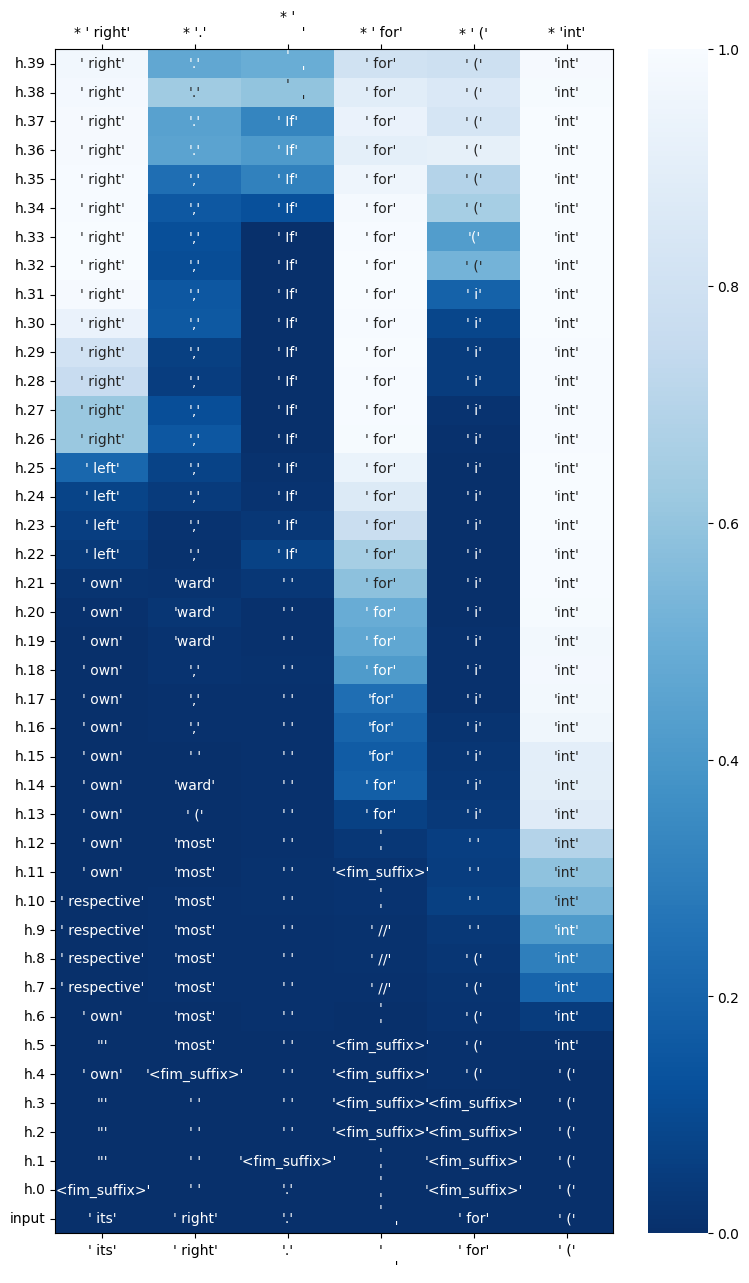

In [10]:
from transformer_utils.logit_lens import plot_logit_lens

prompt = [java_data[0]]
print(prompt)
input_ids = lm.tokenizer(prompt, return_tensors="pt")["input_ids"].to("cuda")
print(len(input_ids[0]))
plot_logit_lens(lm.model, lm.tokenizer, input_ids, start_ix=257, end_ix=-1, probs = True)


## Trace with patch

In [35]:
layers = [0, 1, 2, 3, 4, 5, 6, 7]
heads_to_patch = []
for l in layers:
    if l == 0:
        heads_to_patch += [(i, lm.layername(l, "embed")) for i in range(48)]
    else:
        heads_to_patch += [(i, lm.layername(l)) for i in range(48)]
heads_to_patch

[(0, 'transformer.wte'),
 (1, 'transformer.wte'),
 (2, 'transformer.wte'),
 (3, 'transformer.wte'),
 (4, 'transformer.wte'),
 (5, 'transformer.wte'),
 (6, 'transformer.wte'),
 (7, 'transformer.wte'),
 (8, 'transformer.wte'),
 (9, 'transformer.wte'),
 (10, 'transformer.wte'),
 (11, 'transformer.wte'),
 (12, 'transformer.wte'),
 (13, 'transformer.wte'),
 (14, 'transformer.wte'),
 (15, 'transformer.wte'),
 (16, 'transformer.wte'),
 (17, 'transformer.wte'),
 (18, 'transformer.wte'),
 (19, 'transformer.wte'),
 (20, 'transformer.wte'),
 (21, 'transformer.wte'),
 (22, 'transformer.wte'),
 (23, 'transformer.wte'),
 (24, 'transformer.wte'),
 (25, 'transformer.wte'),
 (26, 'transformer.wte'),
 (27, 'transformer.wte'),
 (28, 'transformer.wte'),
 (29, 'transformer.wte'),
 (30, 'transformer.wte'),
 (31, 'transformer.wte'),
 (32, 'transformer.wte'),
 (33, 'transformer.wte'),
 (34, 'transformer.wte'),
 (35, 'transformer.wte'),
 (36, 'transformer.wte'),
 (37, 'transformer.wte'),
 (38, 'transformer.wte

In [36]:
prompts = ["x = 2 + "]
k = 10

p = lm.trace_with_patch(prompts, heads_to_patch=heads_to_patch, replace=True, noise = 0.9)
[lm.tokenizer.decode(i) for i in p.topk(k, dim=0).indices]   

['1', ' (', ' ', '2', '3', '\n', ' =', '(', 's', '0']

In [46]:
import pandas as pd
java_data = pd.read_csv("../data/int_dataset_java.csv")
java_data = list(java_data["prompt"])

In [48]:
results = {}
k = 10
for prompt in tqdm(java_data[:3]):
    p = lm.trace_with_patch([prompt], heads_to_patch=heads_to_patch, replace=True, noise = 0.9)
    results[prompt] = [lm.tokenizer.decode(i) for i in p.topk(k, dim=0).indices]
    

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:10<00:00,  3.41s/it]


In [49]:
results

{'import java.util.*;\nimport java.lang.reflect.*;\nimport org.javatuples.*;\nimport java.security.*;\nimport java.math.*;\nimport java.io.*;\nimport java.util.stream.*;\nclass Problem {\n    // Check if in given array list of numbers, are any two numbers closer to each other than\n    // given threshold.\n    // >>> hasCloseElements((new ArrayList<Float>(Arrays.asList((float)1.0f, (float)2.0f, (float)3.0f))), (0.5f))\n    // (false)\n    // >>> hasCloseElements((new ArrayList<Float>(Arrays.asList((float)1.0f, (float)2.8f, (float)3.0f, (float)4.0f, (float)5.0f, (float)2.0f))), (0.3f))\n    // (true)\n    public static boolean hasCloseElements(ArrayList<Float> numbers, float threshold) {\n        // Sort the list in ascending order\n        Collections.sort(numbers);\n        // Iterate from the first to one less than last index, and check each element with the element\n        // immediately to its right.\n        for (int': [' i',
  '[]',
  ' ',
  'i',
  '0',
  ' =',
  ' in',
  '1',
 

In [72]:
[i.tolist() for i in p.topk(k, dim=0).values]

[0.04908348619937897,
 0.03173741325736046,
 0.03168953210115433,
 0.01515283528715372,
 0.012762169353663921,
 0.010468028485774994,
 0.010056635364890099,
 0.009958377107977867,
 0.00951087661087513,
 0.009235464967787266]

## Search algorthim (stupid version)

- data: python integer completions (5 to start)
- search layer: middle 20-30
- search strategy: 8 heads x layer (40 tot searches)
- metric: top 1 output is not integer
- noise:replace

In [31]:
prompt1 = ["x + 2 = "]
heads1 = lm.search_causal_heads(prompt1, layers=range(15,39), split=4)

prompt1 = ["x = 2 + "]
heads1 = lm.search_causal_heads(prompt1, layers=range(15,39), split=4)

prompt2 = ["for i in range("]
heads2 = lm.search_causal_heads(prompt2, layers=range(15,39), split=4)

prompt3 = ["num = list(range(1,10))\nten = num["]
heads3 = lm.search_causal_heads(prompt3, layers=range(15,39), split=4)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│    1 prompt1 = ["x + 2 = "]                                                                      │
│ ❱  2 heads1 = lm.search_causal_heads(prompt1, layers=range(15,39), split=4)                      │
│    3                                                                                             │
│    4 prompt1 = ["x = 2 + "]                                                                      │
│    5 heads1 = lm.search_causal_heads(prompt1, layers=range(15,39), split=4)                      │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: ModelLoader.search_causal_heads() got an unexpected keyword argument 'split'

In [75]:
list(set(heads1).intersection(set(heads2)).intersection(set(heads3)))

[(18, 'transformer.h.27'),
 (19, 'transformer.h.19'),
 (30, 'transformer.h.19'),
 (29, 'transformer.h.24'),
 (8, 'transformer.h.19'),
 (40, 'transformer.h.24'),
 (37, 'transformer.h.28'),
 (5, 'transformer.h.31'),
 (22, 'transformer.h.25'),
 (7, 'transformer.h.26'),
 (18, 'transformer.h.26'),
 (21, 'transformer.h.32'),
 (18, 'transformer.h.21'),
 (10, 'transformer.h.35'),
 (14, 'transformer.h.29'),
 (3, 'transformer.h.29'),
 (41, 'transformer.h.23'),
 (26, 'transformer.h.17'),
 (37, 'transformer.h.18'),
 (15, 'transformer.h.17'),
 (12, 'transformer.h.34'),
 (23, 'transformer.h.34'),
 (2, 'transformer.h.24'),
 (6, 'transformer.h.22'),
 (34, 'transformer.h.20'),
 (45, 'transformer.h.20'),
 (42, 'transformer.h.33'),
 (37, 'transformer.h.21'),
 (17, 'transformer.h.16'),
 (28, 'transformer.h.16'),
 (33, 'transformer.h.15'),
 (3, 'transformer.h.23'),
 (14, 'transformer.h.23'),
 (22, 'transformer.h.32'),
 (38, 'transformer.h.19'),
 (22, 'transformer.h.30'),
 (25, 'transformer.h.37'),
 (13, 't

In [40]:
heads2

[(0, 'transformer.h.0'),
 (1, 'transformer.h.0'),
 (2, 'transformer.h.0'),
 (3, 'transformer.h.0'),
 (4, 'transformer.h.0'),
 (5, 'transformer.h.0'),
 (6, 'transformer.h.0'),
 (7, 'transformer.h.0'),
 (8, 'transformer.h.0'),
 (9, 'transformer.h.0'),
 (10, 'transformer.h.0'),
 (11, 'transformer.h.0'),
 (12, 'transformer.h.0'),
 (13, 'transformer.h.0'),
 (14, 'transformer.h.0'),
 (15, 'transformer.h.0'),
 (16, 'transformer.h.0'),
 (17, 'transformer.h.0'),
 (18, 'transformer.h.0'),
 (19, 'transformer.h.0'),
 (20, 'transformer.h.0'),
 (21, 'transformer.h.0'),
 (22, 'transformer.h.0'),
 (23, 'transformer.h.0'),
 (24, 'transformer.h.0'),
 (25, 'transformer.h.0'),
 (26, 'transformer.h.0'),
 (27, 'transformer.h.0'),
 (28, 'transformer.h.0'),
 (29, 'transformer.h.0'),
 (30, 'transformer.h.0'),
 (31, 'transformer.h.0'),
 (32, 'transformer.h.0'),
 (33, 'transformer.h.0'),
 (34, 'transformer.h.0'),
 (35, 'transformer.h.0'),
 (36, 'transformer.h.0'),
 (37, 'transformer.h.0'),
 (38, 'transformer.h.0

In [44]:
heads1

[(16, 'transformer.h.0'),
 (17, 'transformer.h.0'),
 (18, 'transformer.h.0'),
 (19, 'transformer.h.0'),
 (24, 'transformer.h.0'),
 (25, 'transformer.h.0'),
 (26, 'transformer.h.0'),
 (27, 'transformer.h.0'),
 (28, 'transformer.h.0'),
 (29, 'transformer.h.0'),
 (30, 'transformer.h.0'),
 (31, 'transformer.h.0'),
 (32, 'transformer.h.0'),
 (33, 'transformer.h.0'),
 (34, 'transformer.h.0'),
 (35, 'transformer.h.0'),
 (36, 'transformer.h.0'),
 (37, 'transformer.h.0'),
 (38, 'transformer.h.0'),
 (39, 'transformer.h.0'),
 (40, 'transformer.h.0'),
 (41, 'transformer.h.0'),
 (42, 'transformer.h.0'),
 (43, 'transformer.h.0'),
 (44, 'transformer.h.0'),
 (45, 'transformer.h.0'),
 (46, 'transformer.h.0'),
 (47, 'transformer.h.0'),
 (0, 'transformer.h.1'),
 (1, 'transformer.h.1'),
 (2, 'transformer.h.1'),
 (3, 'transformer.h.1'),
 (4, 'transformer.h.1'),
 (5, 'transformer.h.1'),
 (6, 'transformer.h.1'),
 (7, 'transformer.h.1'),
 (8, 'transformer.h.1'),
 (9, 'transformer.h.1'),
 (10, 'transformer.h.1

In [42]:
lm.get_logits(["x = 2 + "])


--- Argument Model Logit Lens ---
0: [(' ', 2), ('<fim_suffix>', 1), ('\n', 0), (' (', 0), ('1', 0)]
1: [(' ', 1), ('<fim_suffix>', 0), ('1', 0), (' (', 0), ('\n', 0)]
2: [(' ', 1), ('1', 1), ('<fim_suffix>', 1), (' (', 0), ('\n', 0)]
3: [(' ', 1), ('1', 1), (' (', 1), ('<fim_suffix>', 1), ('\n', 0)]
4: [(' ', 1), (' (', 1), ('1', 1), ('\n', 1), ('<fim_suffix>', 0)]
5: [(' ', 2), ('1', 2), (' (', 1), ('\n', 1), ('2', 1)]
6: [('1', 2), (' (', 1), (' ', 1), ('2', 1), ('3', 0)]
7: [('1', 3), (' ', 2), (' (', 2), ('2', 1), ('3', 0)]
8: [(' (', 2), ('1', 2), (' ', 1), ('2', 1), ('3', 1)]
9: [('1', 2), (' (', 2), (' ', 2), ('2', 1), ('3', 1)]
10: [(' (', 2), ('1', 2), (' ', 2), ('2', 1), ('<fim_middle>', 1)]
11: [('1', 3), (' (', 2), (' ', 2), ('2', 2), ('3', 1)]
12: [('1', 5), ('2', 3), (' (', 3), (' ', 2), ('3', 1)]
13: [('1', 7), ('2', 4), ('3', 2), (' (', 1), ('4', 1)]
14: [('1', 9), ('2', 4), (' ', 3), ('3', 2), (' (', 2)]
15: [('1', 10), ('2', 7), (' ', 3), ('4', 3), (' (', 2)]
16: [(

In [50]:
heads3

[(32, 'transformer.h.15'),
 (33, 'transformer.h.15'),
 (34, 'transformer.h.15'),
 (35, 'transformer.h.15'),
 (36, 'transformer.h.15'),
 (37, 'transformer.h.15'),
 (38, 'transformer.h.15'),
 (39, 'transformer.h.15'),
 (40, 'transformer.h.15'),
 (41, 'transformer.h.15'),
 (42, 'transformer.h.15'),
 (43, 'transformer.h.15'),
 (28, 'transformer.h.16'),
 (29, 'transformer.h.16'),
 (30, 'transformer.h.16'),
 (31, 'transformer.h.16'),
 (32, 'transformer.h.16'),
 (33, 'transformer.h.16'),
 (34, 'transformer.h.16'),
 (35, 'transformer.h.16'),
 (36, 'transformer.h.16'),
 (37, 'transformer.h.16'),
 (38, 'transformer.h.16'),
 (39, 'transformer.h.16'),
 (40, 'transformer.h.16'),
 (41, 'transformer.h.16'),
 (42, 'transformer.h.16'),
 (43, 'transformer.h.16'),
 (24, 'transformer.h.17'),
 (25, 'transformer.h.17'),
 (26, 'transformer.h.17'),
 (27, 'transformer.h.17'),
 (32, 'transformer.h.17'),
 (33, 'transformer.h.17'),
 (34, 'transformer.h.17'),
 (35, 'transformer.h.17'),
 (40, 'transformer.h.17'),
 

In [47]:
set(heads1).intersection(set(heads2)).intersection(set(heads3))

{(0, 'transformer.h.19'),
 (0, 'transformer.h.22'),
 (0, 'transformer.h.23'),
 (0, 'transformer.h.27'),
 (1, 'transformer.h.19'),
 (1, 'transformer.h.22'),
 (1, 'transformer.h.23'),
 (1, 'transformer.h.27'),
 (2, 'transformer.h.19'),
 (2, 'transformer.h.22'),
 (2, 'transformer.h.23'),
 (2, 'transformer.h.27'),
 (3, 'transformer.h.19'),
 (3, 'transformer.h.22'),
 (3, 'transformer.h.23'),
 (3, 'transformer.h.27'),
 (4, 'transformer.h.18'),
 (4, 'transformer.h.27'),
 (5, 'transformer.h.18'),
 (5, 'transformer.h.27'),
 (6, 'transformer.h.18'),
 (6, 'transformer.h.27'),
 (7, 'transformer.h.18'),
 (7, 'transformer.h.27'),
 (8, 'transformer.h.18'),
 (8, 'transformer.h.19'),
 (8, 'transformer.h.20'),
 (8, 'transformer.h.21'),
 (8, 'transformer.h.22'),
 (8, 'transformer.h.23'),
 (8, 'transformer.h.26'),
 (8, 'transformer.h.27'),
 (9, 'transformer.h.18'),
 (9, 'transformer.h.19'),
 (9, 'transformer.h.20'),
 (9, 'transformer.h.21'),
 (9, 'transformer.h.22'),
 (9, 'transformer.h.23'),
 (9, 'transf

In [51]:
lm.get_logits(prompt2)


--- Argument Model Logit Lens ---
0: [('(', 1), (' ', 1), (' (', 1), ('<fim_suffix>', 0), ('\n', 0)]
1: [(' ', 1), ('(', 1), (' (', 0), ('\n', 0), ('<fim_suffix>', 0)]
2: [(' ', 2), (' (', 1), ('(', 1), ('s', 1), ('\n', 1)]
3: [(' ', 3), (' (', 2), ('s', 1), ('\n', 1), ('(', 1)]
4: [(' ', 5), (' (', 2), ('s', 1), ('\n', 1), ('(', 1)]
5: [(' ', 6), (' (', 3), ('s', 1), ('1', 1), ('0', 1)]
6: [(' ', 8), (' (', 3), ('s', 2), ('0', 2), ('1', 1)]
7: [(' ', 12), (' (', 4), ('0', 3), ('1', 2), ('s', 2)]
8: [(' ', 9), ('0', 4), (' (', 3), ('1', 3), ('s', 2)]
9: [(' ', 7), ('0', 4), ('1', 3), (' (', 3), ('s', 2)]
10: [(' ', 8), ('0', 6), ('1', 5), (' (', 3), ('2', 2)]
11: [(' ', 11), ('1', 9), ('0', 7), (' (', 4), ('3', 3)]
12: [(' ', 18), ('1', 12), ('0', 11), (' (', 4), ('3', 3)]
13: [(' ', 22), ('1', 12), ('0', 10), (' (', 4), ('len', 3)]
14: [(' ', 21), ('1', 13), ('0', 12), ('len', 6), (' (', 3)]
15: [(' ', 21), ('1', 19), ('0', 12), ('len', 9), (' (', 3)]
16: [(' ', 21), ('len', 20), ('1

In [19]:
lm.model.transformer.h[1].attn

GPTBigCodeAttention(
  (c_attn): Linear(in_features=6144, out_features=6400, bias=True)
  (c_proj): Linear(in_features=6144, out_features=6144, bias=True)
  (attn_dropout): Dropout(p=0.1, inplace=False)
  (resid_dropout): Dropout(p=0.1, inplace=False)
)